# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns




#libaries for numerical and statsical functions 
import numpy as np
from scipy import stats



sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


import pylab
import scipy.stats as stat

## Loading the dataset

In [2]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
#Overview of our Dataset
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Total of 15 columns  with dtypes: float64(9), int64(2), object(4) Total Rows:  3454 entries

Some our columns are missing data 
- main_camera_mp

In [5]:
#Description of the data in the DataFrame. 
stats = df.describe().T

stats[['mean','50%','min','max']]

,mean,50%,min,max
screen_size,13.713115,12.830000,5.080000,30.710000
main_camera_mp,9.460208,8.000000,0.080000,48.000000
selfie_camera_mp,6.554229,5.000000,0.000000,32.000000
int_memory,54.573099,32.000000,0.010000,1024.000000
ram,4.036122,4.000000,0.020000,12.000000
battery,3133.402697,3000.000000,500.000000,9720.000000
weight,182.751871,160.000000,69.000000,855.000000
release_year,2015.965258,2015.500000,2013.000000,2020.000000
days_used,674.869716,690.500000,91.000000,1094.000000
normalized_used_price,4.364712,4.405133,1.536867,6.619433


We can see the range between each of our columns in the table above in the Min and Max
- release year is between 2013 and 2020 
- days used ranges betweem 91 and 1094

Some our columns means are greater then our median presenting a right skewed distribution with can present outliers 
- int_memory
- battery
- weight

In [6]:
col = [a for a in df.select_dtypes(include=[np.number])]
print(f'The percentace of data within 3 standards of')
for a in col:
    x = df.loc[(df[a] <= df[a].mean()+ 3 *df[a].std())&
          (df[a]>+ df[a].mean() - 3 * df[a].std())][a].count()/df[a].count()
    
    print(f' {a}: {np.round(x,3)}%')

The percentace of data within 3 standards of
 screen_size: 0.965%
 main_camera_mp: 0.997%
 selfie_camera_mp: 0.973%
 int_memory: 0.985%
 ram: 0.995%
 battery: 0.981%
 weight: 0.964%
 release_year: 1.0%
 days_used: 1.0%
 normalized_used_price: 0.99%
 normalized_new_price: 0.99%


The majority of the numeric columns are within 3std from the mean. We can remove the data that is not between 3 stds since it will affect our model later on 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

# Exploratory Data Analysis (EDA) 

In [7]:
# We will vizualize all numeric columns in our data frame.
df.select_dtypes(np.number).columns.to_list()

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [8]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)

    """
    min_val = data[feature].min()
    max_val = data[feature].max()
    mean_val = data[feature].mean()
    med_val = data[feature].median()
    mod_val = data[feature].mode()[0]
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.tight_layout()
    
    plt.show()
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))


In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

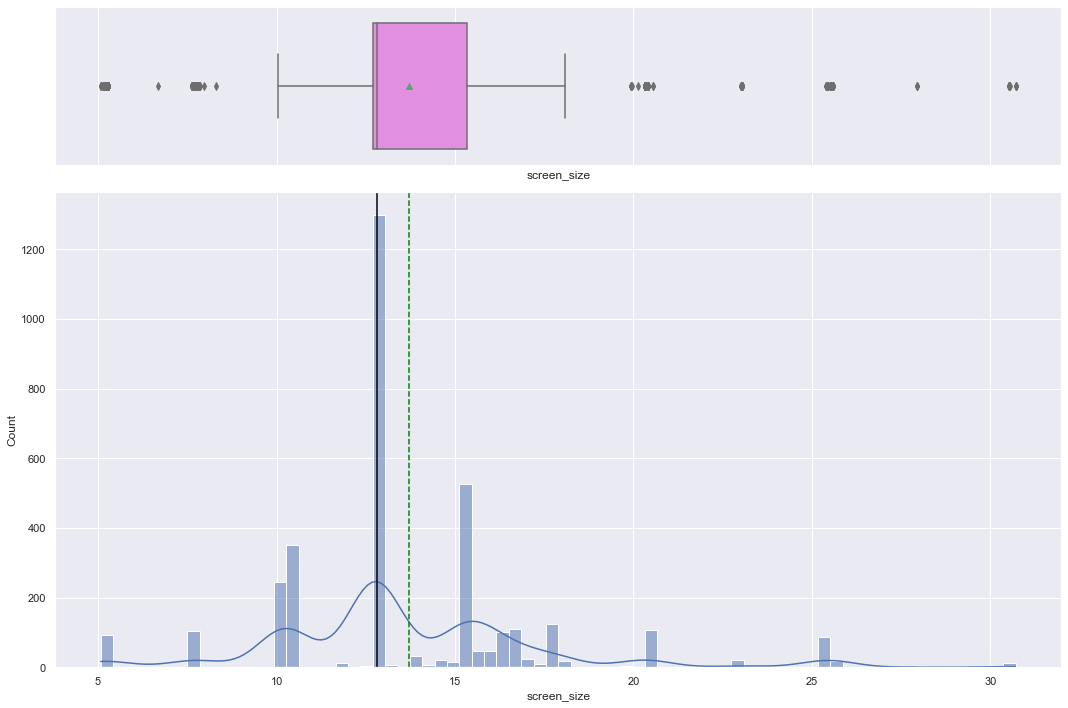

Minimum:5.08
Mean:13.71
Median:12.83
Mode:12.70
Maximum:30.71



In [10]:
histogram_boxplot(df, 'screen_size')

We can see that most of our values in __screen_size__ column are spread out with our most common value in 12.83
<br>
The range in__screen_size__  differs from 5.08 - 30.71


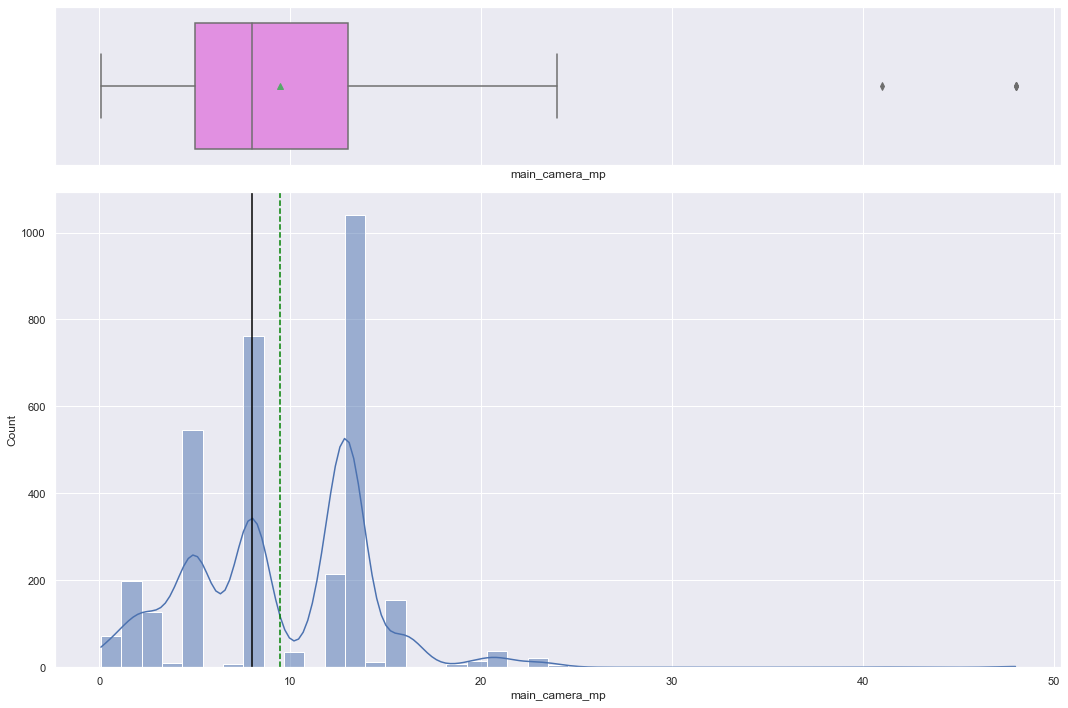

Minimum:0.08
Mean:9.46
Median:8.00
Mode:13.00
Maximum:48.00



In [11]:
histogram_boxplot(df, 'main_camera_mp')

We can see the range in __main_camera_mp__ is from 0.08 to 48.00 with our most common value to be 13.00. There are some outliers in our columns shown in our boxplot

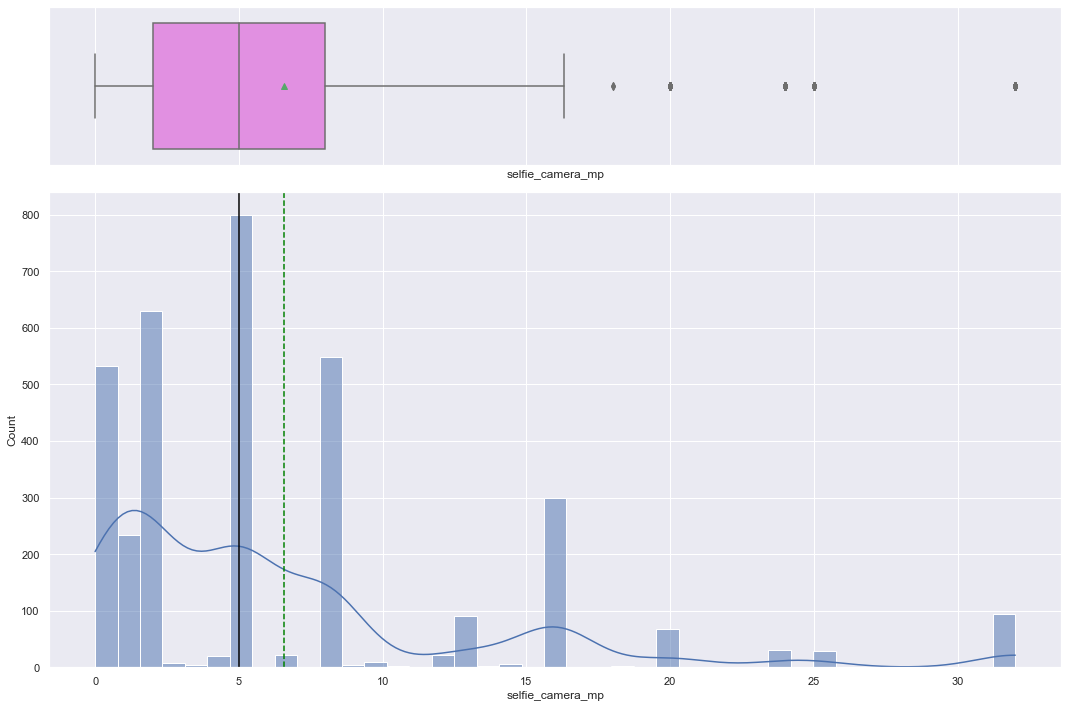

Minimum:0.00
Mean:6.55
Median:5.00
Mode:5.00
Maximum:32.00



In [12]:
histogram_boxplot(df,'selfie_camera_mp')

We can see the same pattern in our __selfie_camera_mp__ from our previous column the range from our column is 0.00 - 32.00. This column also presents outliers 

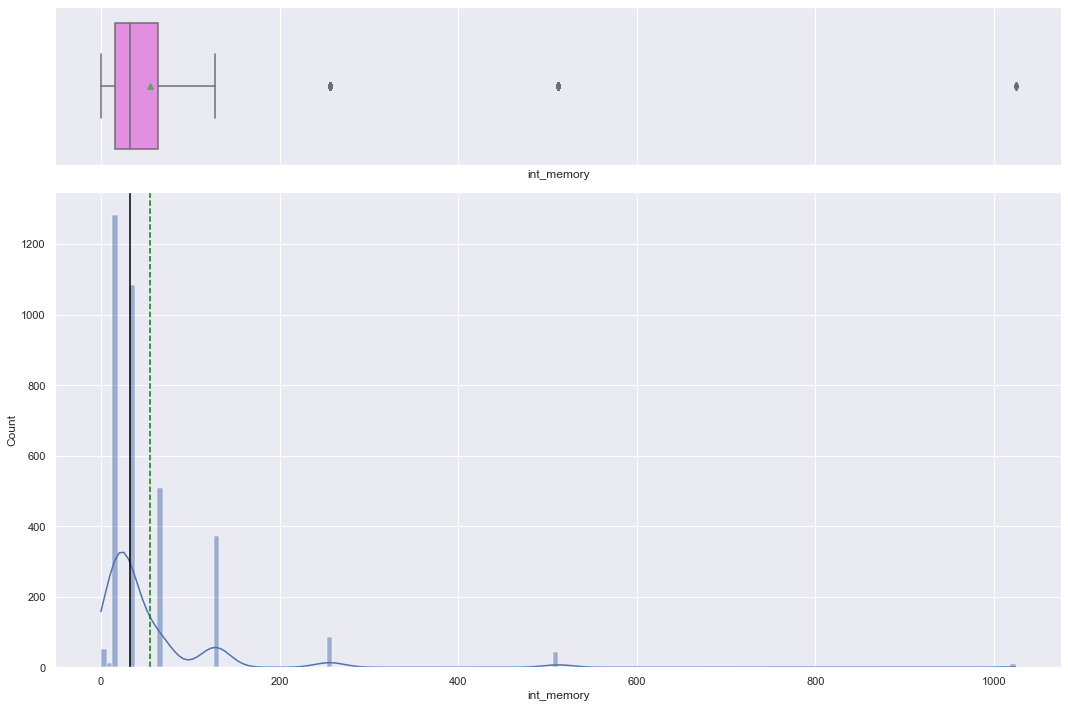

Minimum:0.01
Mean:54.57
Median:32.00
Mode:16.00
Maximum:1024.00



In [13]:
histogram_boxplot(df, 'int_memory')

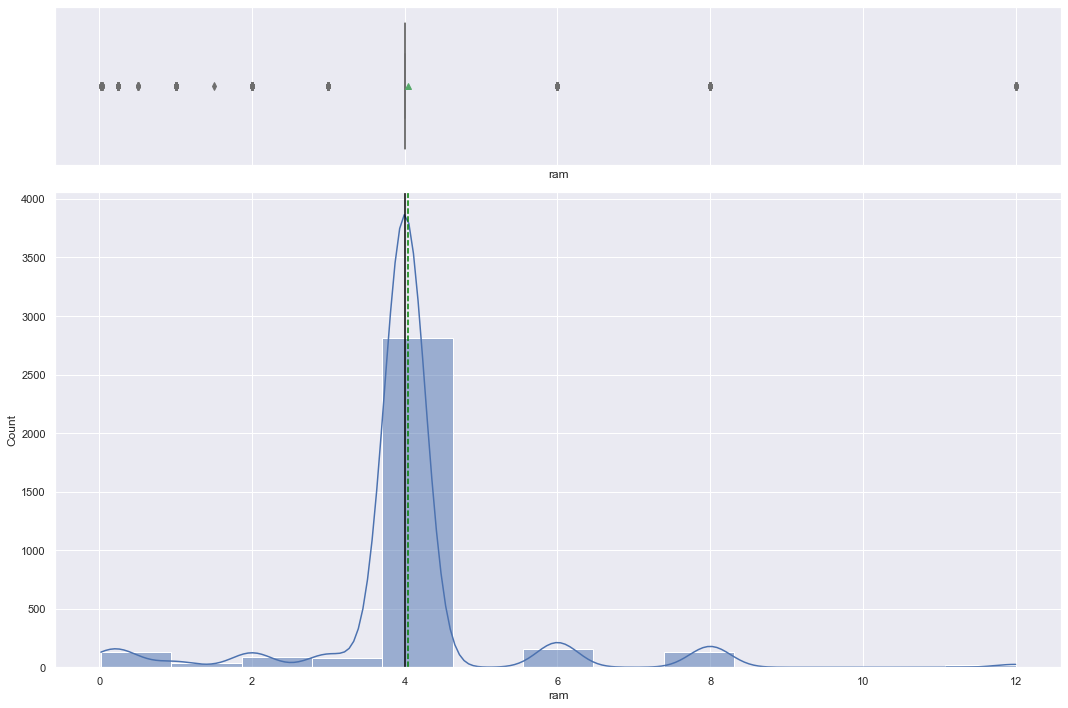

Minimum:0.02
Mean:4.04
Median:4.00
Mode:4.00
Maximum:12.00



In [14]:
histogram_boxplot(df, 'ram')

Our most common value in all our devices is 4.00

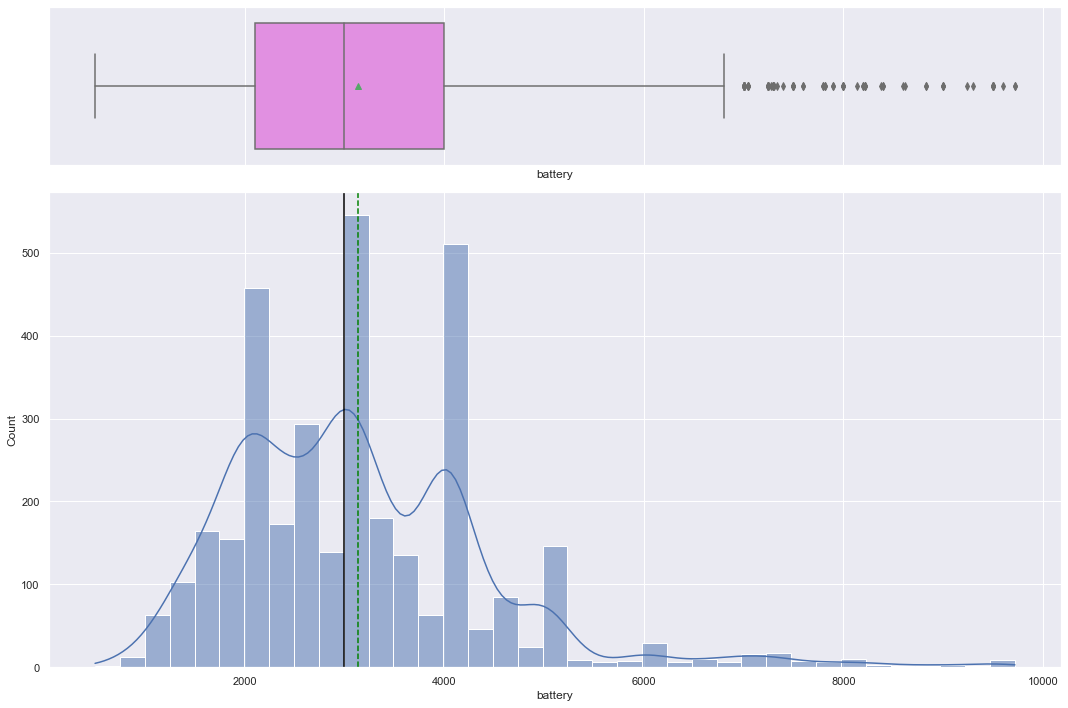

Minimum:500.00
Mean:3133.40
Median:3000.00
Mode:4000.00
Maximum:9720.00



In [15]:
histogram_boxplot(df, 'battery')

We can see that our column present some outliers as well and most of devices hold a __battery__ of 3000

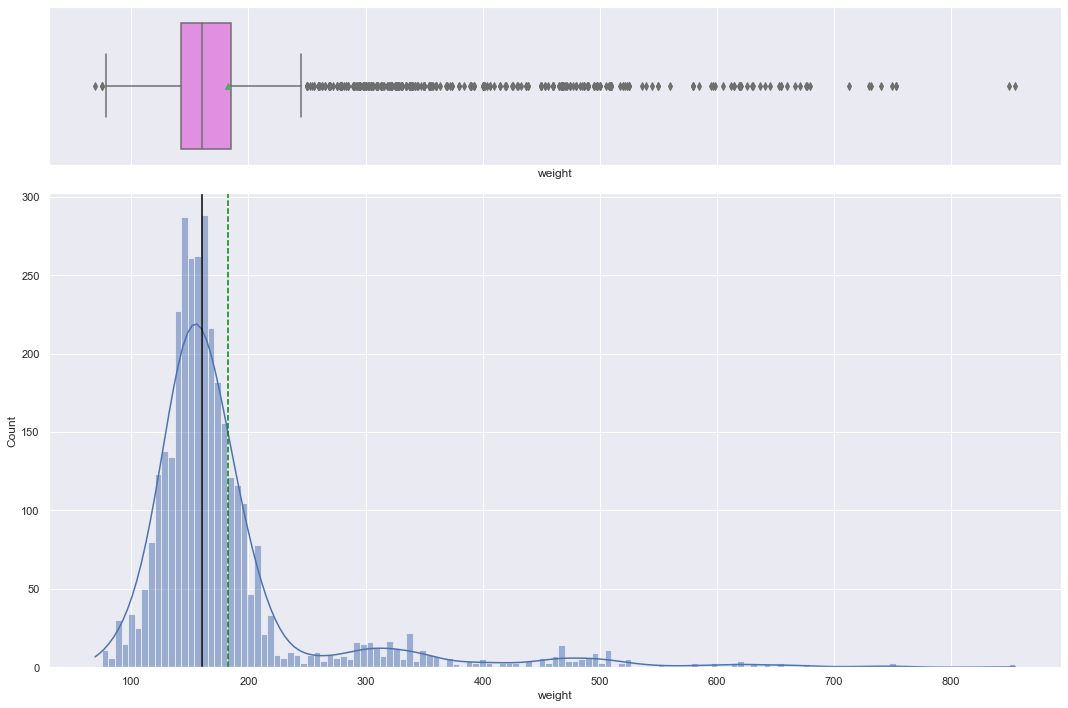

Minimum:69.00
Mean:182.75
Median:160.00
Mode:150.00
Maximum:855.00



In [16]:
histogram_boxplot(df, 'weight')

Our __weight__ column holds a right skewed distribution with values ranging low as 69 up tp 855.00

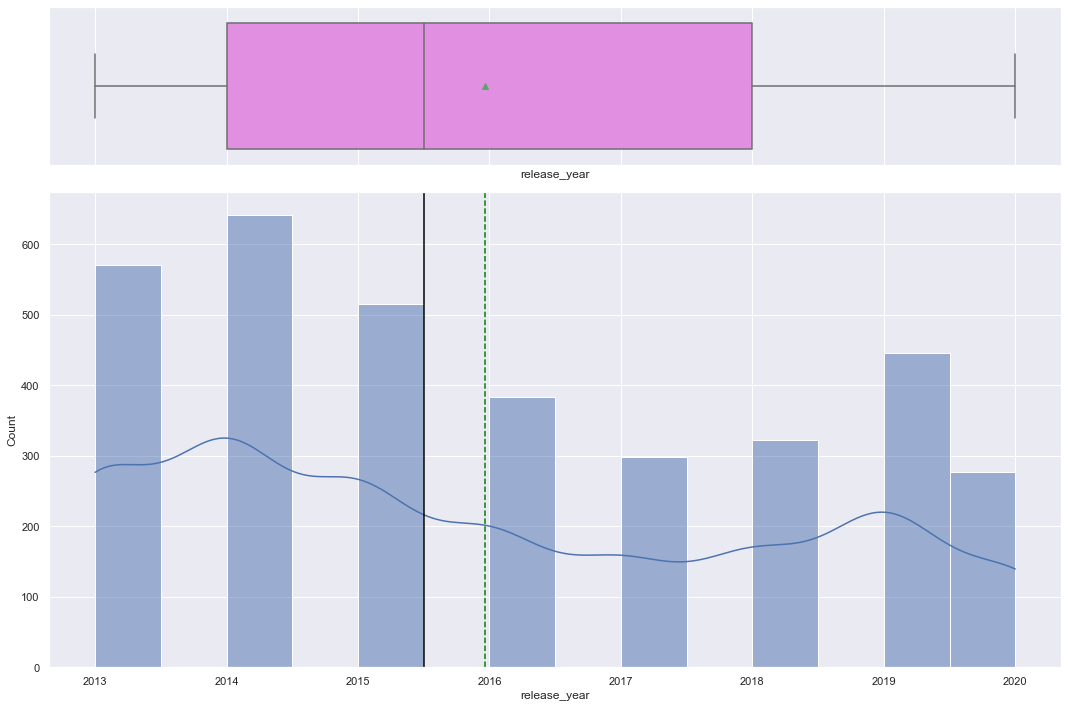

Minimum:2013.00
Mean:2015.97
Median:2015.50
Mode:2014.00
Maximum:2020.00



In [17]:
histogram_boxplot(df, 'release_year')

Our __release_years__ ranges from 2013 till 2020. We can see that we have more values in our 2013, 2014,and 2015

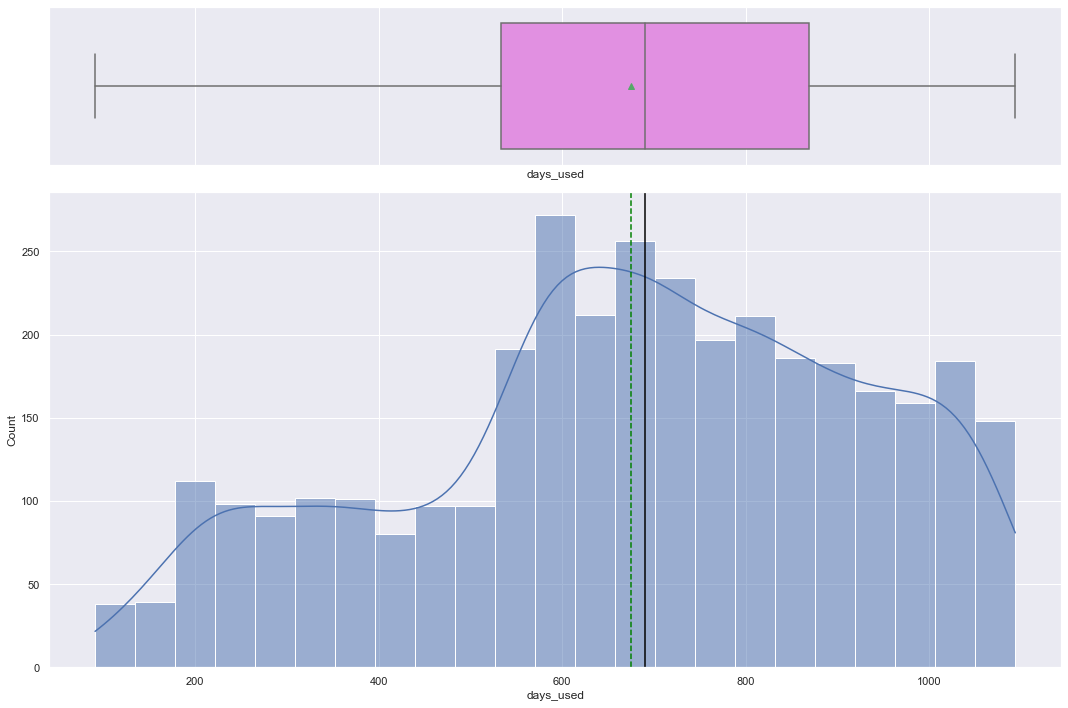

Minimum:91.00
Mean:674.87
Median:690.50
Mode:564.00
Maximum:1094.00



In [18]:
histogram_boxplot(df, 'days_used')

Our devices range from 91 - 1094 days with most our decives holding 2 years or more since they been released 

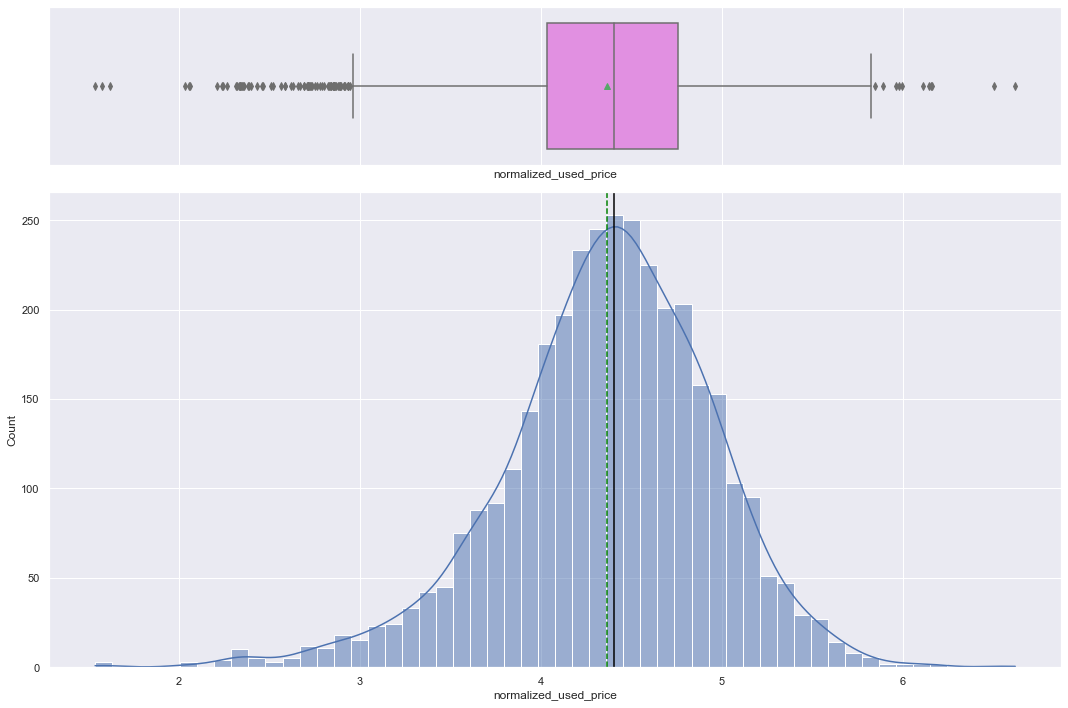

Minimum:1.54
Mean:4.36
Median:4.41
Mode:3.54
Maximum:6.62



In [19]:
histogram_boxplot(df, 'normalized_used_price')

Our __normalized_used_price__ hold a normal distrubtion with most our values at 4-5 euros 

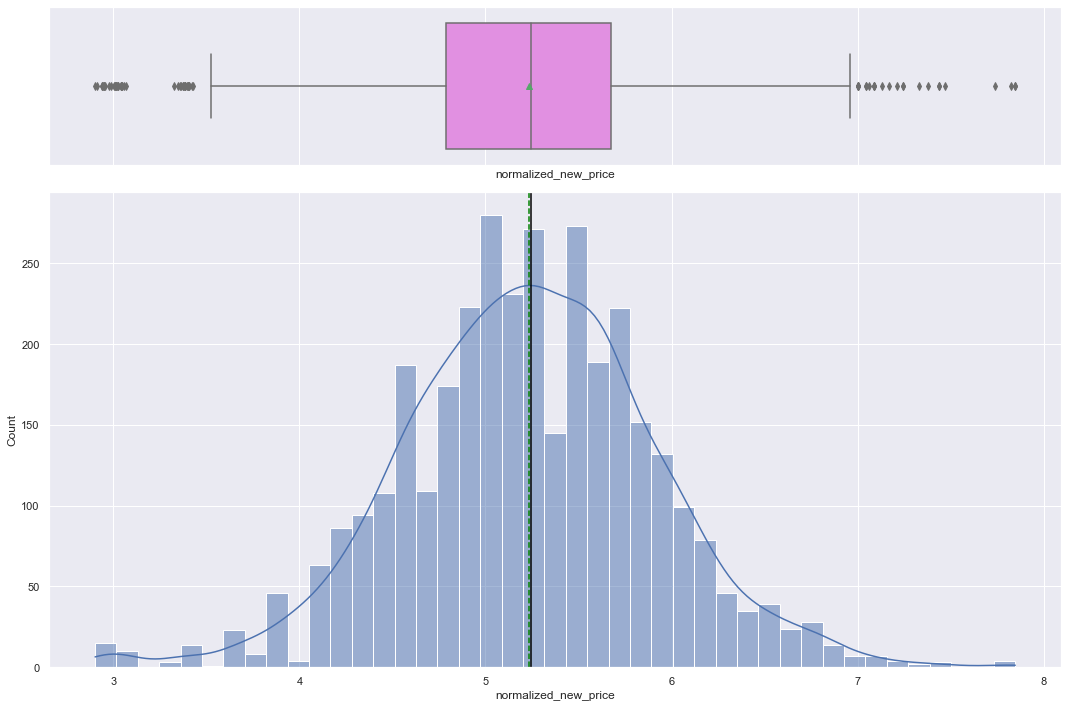

Minimum:2.90
Mean:5.23
Median:5.25
Mode:5.14
Maximum:7.85



In [20]:
histogram_boxplot(df, 'normalized_new_price')

From our previous column we can see that our new prices has increased by 1 euro and it as well holds a normal distrubtion. 

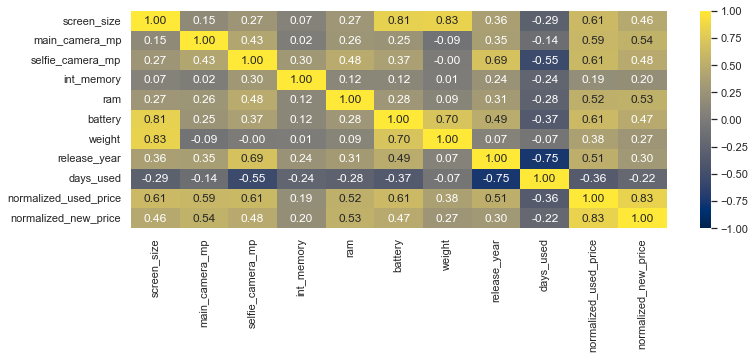

screen_size              0.614785
main_camera_mp           0.587302
selfie_camera_mp         0.608074
int_memory               0.190993
ram                      0.520289
battery                  0.613619
weight                   0.382354
release_year             0.509790
days_used               -0.358264
normalized_used_price    1.000000
normalized_new_price     0.834496
Name: normalized_used_price, dtype: float64

In [21]:
plt.figure(figsize=(12,4))
corr = df.corr()
sns.heatmap(corr, cmap = 'cividis', annot= True, vmin=-1, vmax=1, fmt=".2f",);
plt.show()
# correlations to our normalized used price 
corr['normalized_used_price']





   We can see __strong corr__ in 
- screen_size              0.526154
- main_camera_mp           0.624923
- selfie_camera_mp         0.629426
- int_memory               0.523621
- battery                  0.597861
- normalized_new_price     0.763806
<br> We can see __negative corr__ in :
- days_used               -0.269686

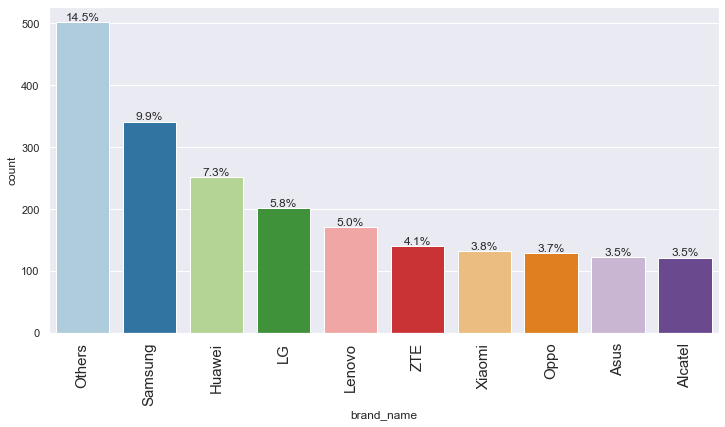

In [22]:
labeled_barplot(df, "brand_name", perc=True, n=10)

Most of products are undefined holding 14.5% with samgsung holding 9.9% 

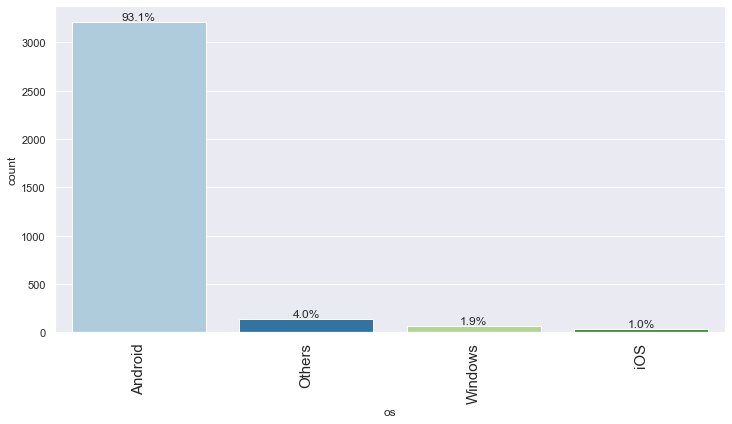

In [23]:
labeled_barplot(df, "os", perc=True, n=10)

Most products are android holding 93.1%

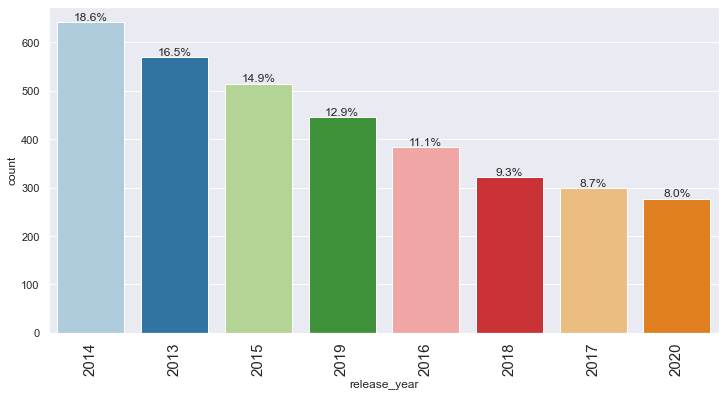

In [24]:
labeled_barplot(df, "release_year", perc=True, n=10)

Majority  of our phones were release in 2014

<AxesSubplot:xlabel='normalized_used_price', ylabel='Count'>

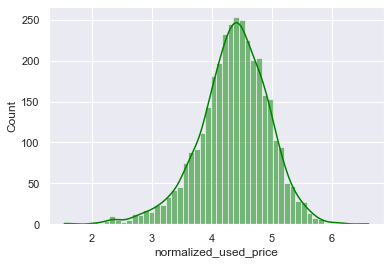

In [25]:
#What does the distribution of normalized used device prices look like?
sns.histplot(data = df, x =  'normalized_used_price' , color = 'green', label='normalized_used_price', kde=True)

We can see that the normalized used price has a normal distrubtion and most of our values lies around 4-5 Euros 

In [26]:
#What percentage of the used device market is dominated by Android devices?
x = np.round(df[df['os'] == 'Android'].shape[0] / len(df) * 100 ,2)
print(f'The percentage of Android market is {x}')

The percentage of Android market is 93.05


In [27]:
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
df.groupby('brand_name')['ram'].mean().sort_values(ascending = False)

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.655378
Honor         4.603448
Xiaomi        4.583333
Google        4.533333
Meizu         4.451613
Samsung       4.199413
Realme        4.195122
Sony          4.069767
Asus          4.049180
ZTE           4.023214
HTC           4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Panasonic     4.000000
Coolpad       3.954545
Motorola      3.943396
LG            3.936567
Gionee        3.933036
Acer          3.901961
Lenovo        3.885965
BlackBerry    3.829545
Others        3.777888
Spice         3.750000
Micromax      3.679487
Alcatel       3.407025
Karbonn       3.353448
Lava          3.277778
Infinix       2.600000
Nokia         2.420294
Celkon        1.613636
Name: ram, dtype: float64

These brand names hold highest average amount of RAM in GB:
- OnePlus       6.363636
- Oppo          4.961240
- Vivo          4.756410
- Huawei        4.655378
- Honor         4.603448

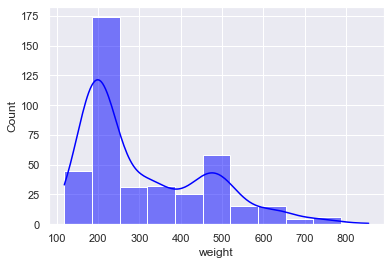

brand_name
Google       517.000000
Lenovo       442.721429
Apple        439.558824
HTC          425.000000
Sony         415.285714
Acer         383.037500
Alcatel      380.000000
Others       374.856522
Huawei       362.586957
Samsung      358.783871
LG           326.580000
Asus         313.772727
Nokia        252.666667
Honor        246.733333
Xiaomi       227.472973
Gionee       209.430000
Motorola     200.757143
Meizu        200.333333
ZTE          197.454545
Realme       196.833333
Vivo         196.119355
Oppo         195.000000
Infinix      193.000000
Panasonic    182.000000
Spice        158.000000
Micromax     118.000000
Name: weight, dtype: float64

In [28]:
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#Subset by large batteries 
large_battery = df[df['battery'] >= 4500]
#Plot weight column of each of batteries over 4500
sns.histplot(data = large_battery , x ='weight', color = 'blue', kde= 'True' )
plt.show()
large_battery.groupby('brand_name')['weight'].mean().sort_values(ascending = False)

We can see that large batteries  hold mostly around 200 grams with far as 800 grams 
<br>  These brands hold the highest average weight 
- Google       517.000000
- Lenovo       442.721429
- Apple        439.558824
- HTC          425.000000
- Sony         415.285714

In [29]:
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
#Subset by screen size larger than 6
six_screen = df[df['screen_size'] > 6]

#group by brand and counting all entries 
six_screen.groupby('brand_name')['screen_size'].count().sort_values(ascending = False)

brand_name
Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     21
Google         15
Infinix        10
Name: screen_size, dtype: int64

These brand names hold the largest count of entries screen size larger than 6 in our DataFrame
<br>
- Others        479 <br>
- Samsung       334 <br>
- Huawei        251 <br>
- LG            197 <br>
- Lenovo        171

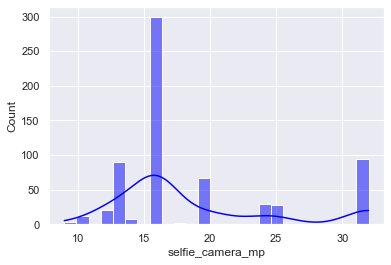

In [30]:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
eight_mp = df[df['selfie_camera_mp'] > 8]
sns.histplot(data = eight_mp, x = 'selfie_camera_mp',color = 'blue', kde= True)
plt.show()

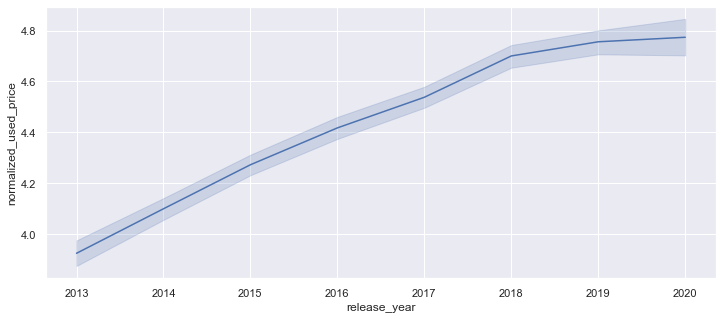

In [31]:

plt.figure(figsize=(12, 5))
sns.lineplot(data = df,x = 'release_year',y="normalized_used_price")
plt.show()

normalized_used_price is increasing year over year.

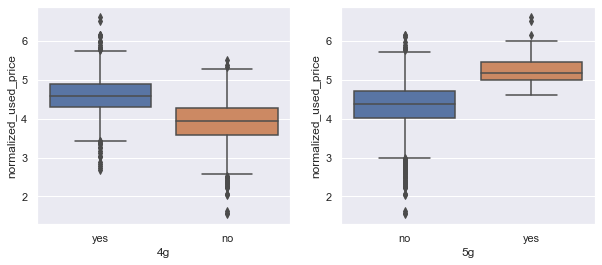

In [32]:
#prices vary for used phones and tablets offering 4G and 5G networks.
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

5g holds a higher price between them 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [33]:
#Missing value treatment
df.isna().sum() / len(df)

brand_name               0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
main_camera_mp           0.051824
selfie_camera_mp         0.000579
int_memory               0.001158
ram                      0.001158
battery                  0.001737
weight                   0.002027
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

In [34]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
     df[col].fillna(
        value=df.groupby(['brand_name'])[col].transform("median")
    ,inplace = True )   
#Missing value treatment
df.isna().sum()


brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [35]:
df.dropna(inplace = True )

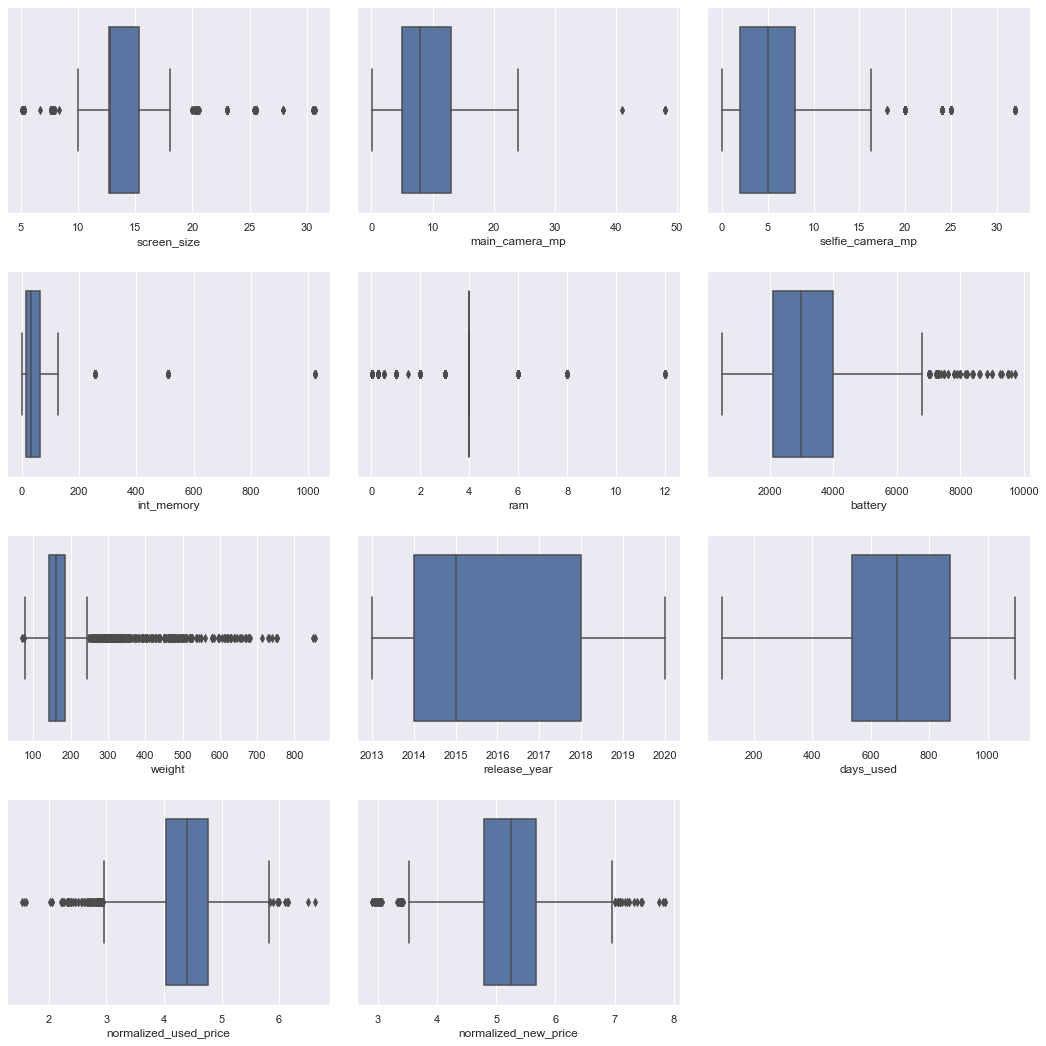

In [36]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## EDA

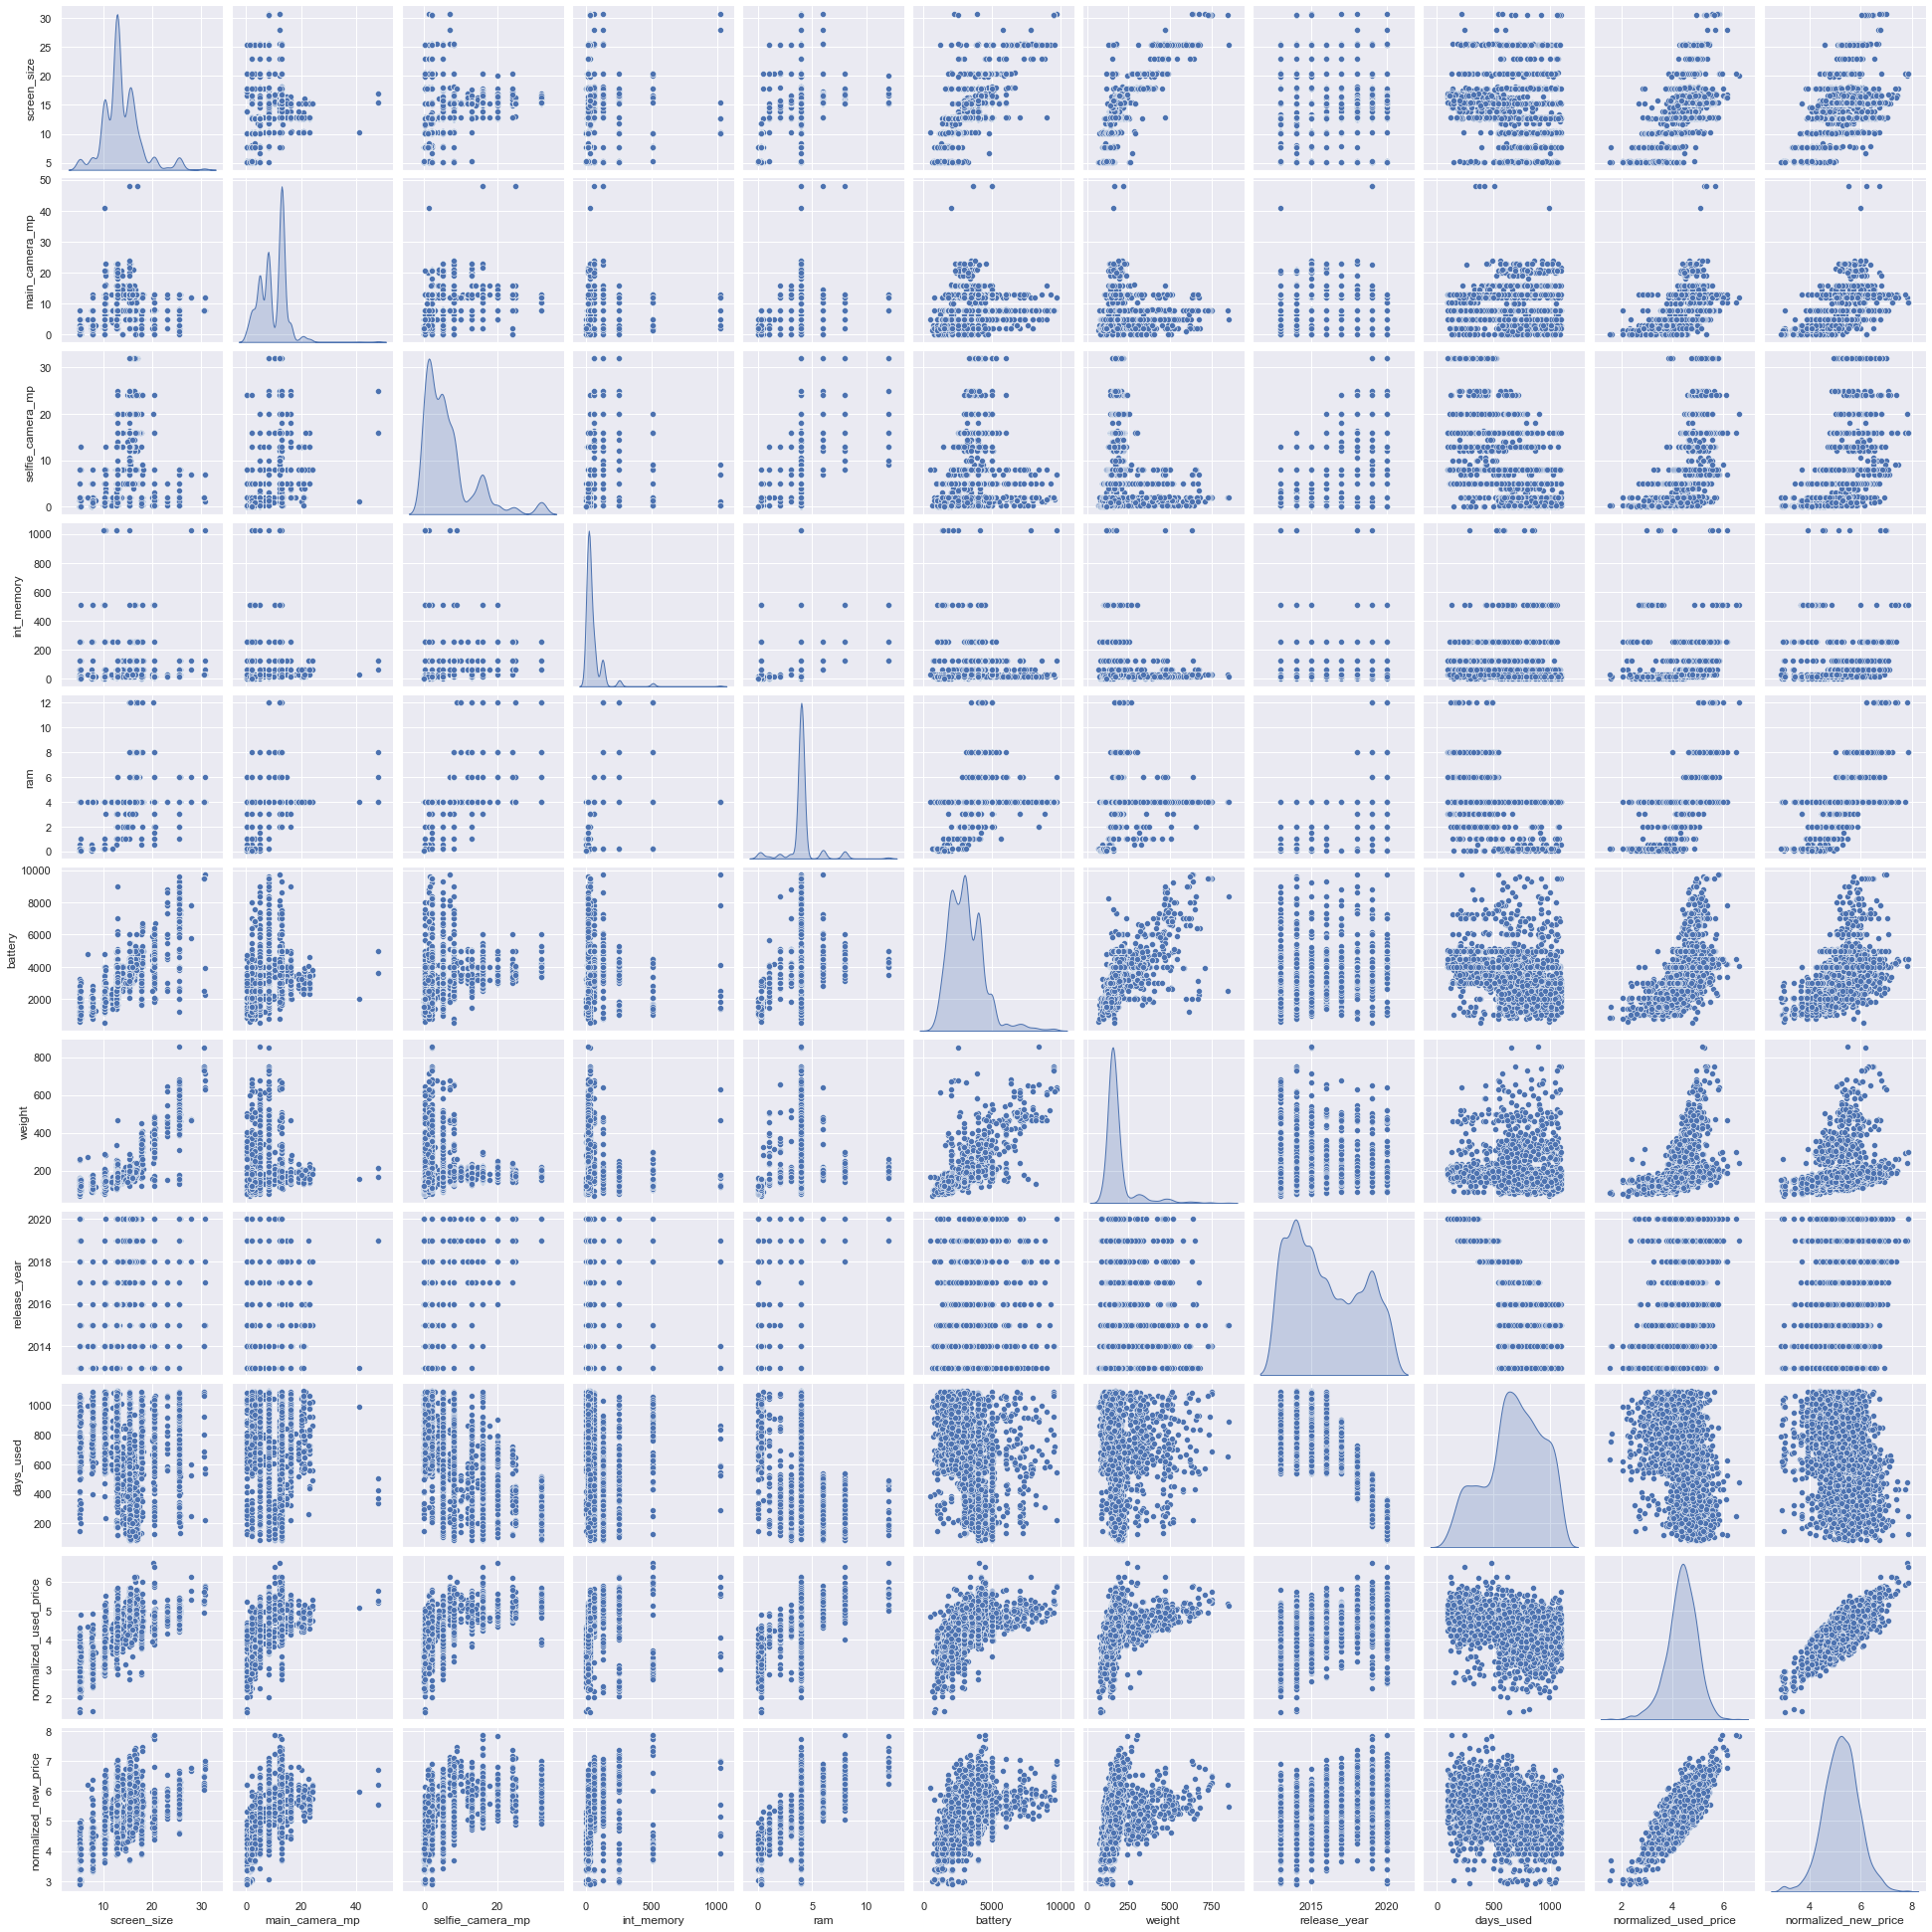

In [37]:
sns.pairplot(data = df, diag_kind = 'kde');

We dont see any strong linear relationship in our data except in our battery and weight columns 

## Model Building - Linear Regression

In [38]:
# defining X and y variables
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

In [39]:
# let's add the intercept to data
X = sm.add_constant(X)
X

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,6.483872
3450,1.0,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,6.251538
3451,1.0,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.528829
3452,1.0,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.624188


In [40]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2410
Number of rows in test data = 1034


In [43]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     275.8
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           18:21:40   Log-Likelihood:                 80.997
No. Observations:                   2410   AIC:                            -65.99
Df Residuals:                       2362   BIC:                             211.8
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


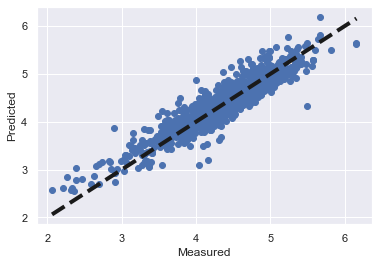

In [44]:

predicted = olsmodel.predict(x_test) 
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Interpreting the Regression Results:
1. __Adjusted. R-squared__ : It reflects the fit of the model.
- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for adj. R-squared is   0.843, which is good.
2. __const coefficient__ : It is the Y-intercept.
- It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
- In our case, the value for const coefficient is -49.9858   


## Model Performance Check

Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for __RMSE__, __MAE__, and __R2__
.
We will define a function to calculate __MAPE__ and __adjustedR2__
.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [45]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [46]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233974,0.181465,0.845867,0.842734,4.380732


In [47]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229577,0.179787,0.840412,0.832635,4.270302


Observations

- The training  R2 is 0.845867, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.179787 on the test data

- MAPE of 4.270302 on the test data means that we are able to predict within 4.2% of the "normalized_used_price"

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [48]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i),3) for i in range(len(predictors.columns))
    ]
    return vif

In [49]:
checking_vif(x_train).sort_values(by = 'VIF',
                                  ascending = False)

,feature,VIF
0,const,3646388.307
12,brand_name_Apple,12.932
45,os_iOS,11.792
33,brand_name_Others,9.296
1,screen_size,7.730
36,brand_name_Samsung,7.017
7,weight,6.090
21,brand_name_Huawei,5.633
23,brand_name_LG,4.769
8,release_year,4.700


### Removing Multicollinearity
To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.<br>
Let's define a function that will help us do this.

In [50]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [51]:
cols = ['screen_size','os_iOS', 'brand_name_Apple', 'brand_name_Others', 'brand_name_Samsung','weight','brand_name_Huawei']

treating_multicollinearity(x_train, y_train,cols )

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.842867,0.236289
1,brand_name_Apple,0.842866,0.236289
2,brand_name_Huawei,0.842865,0.236290
3,brand_name_Samsung,0.842858,0.236296
4,os_iOS,0.842846,0.236304
5,weight,0.839132,0.239081
6,screen_size,0.839072,0.239125


After removing each of our  high_vif_columns we can see that the Adj R2 isnt really affected

In [52]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif.sort_values(by =  'VIF', ascending = False)

VIF after dropping  weight


,feature,VIF
0,const,3544818.352
11,brand_name_Apple,12.929
44,os_iOS,11.763
32,brand_name_Others,9.277
35,brand_name_Samsung,7.017
20,brand_name_Huawei,5.633
22,brand_name_LG,4.769
7,release_year,4.567
24,brand_name_Lenovo,4.337
6,battery,4.173


In [53]:
col_to_drop = "brand_name_Apple"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif.sort_values(by =  'VIF', ascending = False)

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3536673.254
31,brand_name_Others,8.722
34,brand_name_Samsung,6.565
19,brand_name_Huawei,5.293
7,release_year,4.556
21,brand_name_LG,4.512
6,battery,4.173
23,brand_name_Lenovo,4.106
1,screen_size,4.045
40,brand_name_ZTE,3.555


In [54]:
col_to_drop = "brand_name_Others"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif.sort_values(by =  'VIF', ascending = False)

VIF after dropping  brand_name_Others


,feature,VIF
0,const,3536275.660
7,release_year,4.555
6,battery,4.171
1,screen_size,4.020
9,normalized_new_price,3.097
3,selfie_camera_mp,2.839
8,days_used,2.543
43,4g_yes,2.441
5,ram,2.252
2,main_camera_mp,2.223


#### None of the variables show moderate of high multicollinearity 

## Dropping high p-value variables
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
1. Build a model, check the p-values of the variables, and drop the column with the highest p-value.
2. Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
2. Repeat the above two steps till there are no columns with p-value > 0.05.


In [55]:
# initial list of columns
cols = x_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train4[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value >= 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', 'brand_name_Xiaomi', 'os_Windows', '4g_yes']


In [56]:
X_train = x_train4[selected_features]
X_test = x_test4[selected_features]

In [57]:
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1403.
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           18:21:42   Log-Likelihood:                 38.043
No. Observations:                   2410   AIC:                            -56.09
Df Residuals:                       2400   BIC:                             1.788
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variable

## TEST FOR LINEARITY AND INDEPENDENCE
- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [58]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1397,4.034241,4.172993,-0.138752
2662,4.487062,4.721927,-0.234865
693,4.029095,4.275671,-0.246577
1463,4.004237,3.948551,0.055687
3333,4.558288,4.540054,0.018234


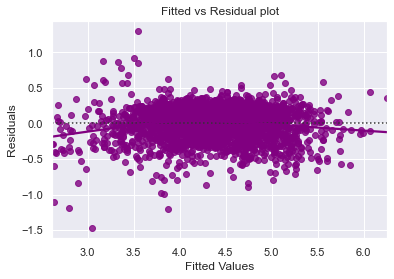

In [59]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observations

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

## TEST FOR NORMALITY
- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

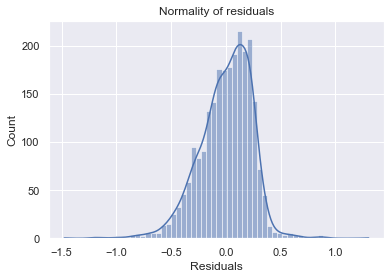

In [60]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

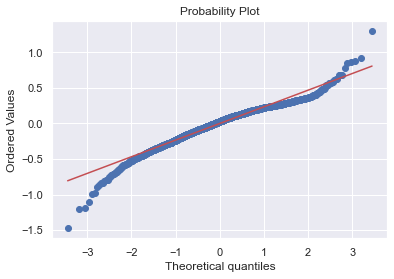

In [61]:
stat.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [62]:
stat.shapiro(df_pred["Residuals"]).pvalue

2.2329540959396653e-23

Observations
- The histogram of residuals almost has a bell shape structure
- The residuals almost follow a straight line.
- Shapiro results says the distribution is nonnormal but from our previous we can see that is 

## TEST FOR HOMOSCEDASTICITY
- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [63]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"],  X_train)
lzip(name, test)

[('F statistic', 1.1372548370451985), ('p-value', 0.013147017003204257)]

Observations

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

__All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it__

## Final Model

In [64]:
olsmodel_final = sm.OLS(y_train, X_train).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1403.
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           18:21:44   Log-Likelihood:                 38.043
No. Observations:                   2410   AIC:                            -56.09
Df Residuals:                       2400   BIC:                             1.788
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights and Recommendations 

- A unit increase in screen_size  increase  the normalized_used_price by 0.0430 units, all other variables held constant.
- A unit increase in main_camera_mp   increase  the normalized_used_price by 0.0186 units, all other variables held constant.
- A unit increase in selfie_camera_mp  increase  the normalized_used_price by 0.0186  units, all other variables held constant.
- A unit increase in ram   increase  the normalized_used_price by 0.0430 units, all other variables held constant.
- A unit increase in release_year increase  the normalized_used_price by 0.0157 units, all other variables held constant.
- A unit increase in normalized_new_price  increase  the normalized_used_price by 0.4341 units, all other variables held constant.
- A unit increase in brand_name_Xiaomi  increase  the normalized_used_price by 0.0761  units, all other variables held constant
- A unit increase in os_Windows  increase  the normalized_used_price by 0.0680 units, all other variables held constant
- A unit increase in 4g_yes  increase  the normalized_used_price by 0.0537units, all other variables held constant


___